In [1]:
import os
import sys
import time
import shutil
import logging
import argparse
import yaml
import traceback

import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
cd ../src

/atlas/u/kechoi/multi-fairgen/src


# Load omniglot (as in tf)

In [4]:
def dict2namespace(config):
    namespace = argparse.Namespace()
    for key, value in config.items():
        if isinstance(value, dict):
            new_value = dict2namespace(value)
        else:
            new_value = value
        setattr(namespace, key, new_value)
    return namespace

In [5]:
with open('/atlas/u/kechoi/multi-fairgen/src/configs/classification/omniglot/baseline.yaml') as f:
    config = yaml.load(f)
config = dict2namespace(config)

/atlas/u/kechoi/software/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


### import real data

In [6]:
import torch
from torchvision.datasets import Omniglot
from torch.utils.data import Subset
import torchvision.transforms as T

In [7]:
x = np.load('../../DAGAN/datasets/omniglot_data.npy')

In [8]:
np.min(x)

0.0

In [9]:
np.max(x)

1.0

In [10]:
from torchvision.utils import save_image

In [11]:
x.shape

(1622, 20, 28, 28, 1)

In [12]:
xhat = x.reshape(-1, 28, 28, 1)
xhat.shape

(32440, 28, 28, 1)

In [13]:
xhat = torch.from_numpy(xhat).permute((0,3,1,2))

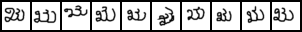

In [14]:
save_image(xhat[0:10], 'a.png', nrow=10)
from IPython.display import Image
Image('a.png')

### import fake data

In [32]:
x[:1200].shape

(1200, 20, 28, 28, 1)

In [40]:
x.shape

(1622, 20, 28, 28, 1)

In [49]:
1622*20

32440

In [48]:
np.repeat(np.arange(len(x)),20).shape

(32440,)

In [45]:
a = torch.tile(labels, (20,1))
a

tensor([[   0,    1,    2,  ..., 1619, 1620, 1621],
        [   0,    1,    2,  ..., 1619, 1620, 1621],
        [   0,    1,    2,  ..., 1619, 1620, 1621],
        ...,
        [   0,    1,    2,  ..., 1619, 1620, 1621],
        [   0,    1,    2,  ..., 1619, 1620, 1621],
        [   0,    1,    2,  ..., 1619, 1620, 1621]])

In [ ]:
self.x = np.load("datasets/omniglot_data.npy")
self.x = self.x / np.max(self.x)
x_train, x_test, x_val = self.x[:1200], self.x[1200:1600], self.x[1600:]
x_train = x_train[:gan_training_index]

In [25]:
split = 'train'
transform = T.Compose([
    T.Resize(config.data.image_size),
    T.ToTensor()
])
data = Omniglot(os.path.join(config.training.data_dir, 'datasets', 'omniglot'), background=False, download=True, transform=transform)

0it [00:00, ?it/s]

Extracting /atlas/u/kechoi/multi-fairgen/data/datasets/omniglot/omniglot-py/images_evaluation.zip to /atlas/u/kechoi/multi-fairgen/data/datasets/omniglot/omniglot-py


In [26]:
data._character_images

[[('1083_06.png', 0),
  ('1083_01.png', 0),
  ('1083_08.png', 0),
  ('1083_19.png', 0),
  ('1083_10.png', 0),
  ('1083_17.png', 0),
  ('1083_09.png', 0),
  ('1083_07.png', 0),
  ('1083_16.png', 0),
  ('1083_11.png', 0),
  ('1083_18.png', 0),
  ('1083_20.png', 0),
  ('1083_12.png', 0),
  ('1083_15.png', 0),
  ('1083_04.png', 0),
  ('1083_03.png', 0),
  ('1083_14.png', 0),
  ('1083_13.png', 0),
  ('1083_02.png', 0),
  ('1083_05.png', 0)],
 [('1075_03.png', 1),
  ('1075_04.png', 1),
  ('1075_15.png', 1),
  ('1075_12.png', 1),
  ('1075_20.png', 1),
  ('1075_05.png', 1),
  ('1075_02.png', 1),
  ('1075_13.png', 1),
  ('1075_14.png', 1),
  ('1075_19.png', 1),
  ('1075_17.png', 1),
  ('1075_10.png', 1),
  ('1075_01.png', 1),
  ('1075_06.png', 1),
  ('1075_08.png', 1),
  ('1075_11.png', 1),
  ('1075_16.png', 1),
  ('1075_18.png', 1),
  ('1075_09.png', 1),
  ('1075_07.png', 1)],
 [('1081_17.png', 2),
  ('1081_10.png', 2),
  ('1081_19.png', 2),
  ('1081_08.png', 2),
  ('1081_01.png', 2),
  ('1081

In [24]:
data._character_images

[[('0886_20.png', 0),
  ('0886_12.png', 0),
  ('0886_15.png', 0),
  ('0886_04.png', 0),
  ('0886_03.png', 0),
  ('0886_14.png', 0),
  ('0886_13.png', 0),
  ('0886_02.png', 0),
  ('0886_05.png', 0),
  ('0886_06.png', 0),
  ('0886_01.png', 0),
  ('0886_08.png', 0),
  ('0886_19.png', 0),
  ('0886_10.png', 0),
  ('0886_17.png', 0),
  ('0886_09.png', 0),
  ('0886_07.png', 0),
  ('0886_16.png', 0),
  ('0886_11.png', 0),
  ('0886_18.png', 0)],
 [('0891_09.png', 1),
  ('0891_07.png', 1),
  ('0891_16.png', 1),
  ('0891_11.png', 1),
  ('0891_18.png', 1),
  ('0891_06.png', 1),
  ('0891_01.png', 1),
  ('0891_08.png', 1),
  ('0891_19.png', 1),
  ('0891_10.png', 1),
  ('0891_17.png', 1),
  ('0891_14.png', 1),
  ('0891_13.png', 1),
  ('0891_02.png', 1),
  ('0891_05.png', 1),
  ('0891_20.png', 1),
  ('0891_12.png', 1),
  ('0891_15.png', 1),
  ('0891_04.png', 1),
  ('0891_03.png', 1)],
 [('0854_16.png', 2),
  ('0854_11.png', 2),
  ('0854_18.png', 2),
  ('0854_09.png', 2),
  ('0854_07.png', 2),
  ('0854